 # Data Cleaning and Analyst
 ## Data Aggregation
 ### Groupby Objects

 | Select by Label	| Syntax |
 | --- | --- |
 | Single column| GroupBy["col1"] |
 | List of columns | GroupBy[["col1", "col2"]] |

In [1]:
# Create a GroupBy Object
import pandas as pd
happiness2015 = pd.read_csv("World_Happiness_2015.csv")
first_5 = happiness2015[:5]
first_5.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 12 columns):
Country                          5 non-null object
Region                           5 non-null object
Happiness Rank                   5 non-null int64
Happiness Score                  5 non-null float64
Standard Error                   5 non-null float64
Economy (GDP per Capita)         5 non-null float64
Family                           5 non-null float64
Health (Life Expectancy)         5 non-null float64
Freedom                          5 non-null float64
Trust (Government Corruption)    5 non-null float64
Generosity                       5 non-null float64
Dystopia Residual                5 non-null float64
dtypes: float64(9), int64(1), object(2)
memory usage: 608.0+ bytes


In [2]:
mean_happiness = {}
regions = happiness2015['Region'].unique()

for row in regions:
    region_group = happiness2015[happiness2015['Region'] == row]
    region_mean = region_group['Happiness Score'].mean()
    mean_happiness[row] = region_mean
mean_happiness


{'Western Europe': 6.689619047619048,
 'North America': 7.273,
 'Australia and New Zealand': 7.285,
 'Middle East and Northern Africa': 5.406899999999999,
 'Latin America and Caribbean': 6.1446818181818195,
 'Southeastern Asia': 5.317444444444444,
 'Central and Eastern Europe': 5.332931034482757,
 'Eastern Asia': 5.626166666666666,
 'Sub-Saharan Africa': 4.2028,
 'Southern Asia': 4.580857142857143}

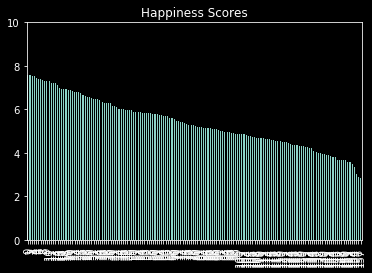

In [3]:
happiness2015['Happiness Score'].plot(kind='bar', title='Happiness Scores', ylim=(0,10))


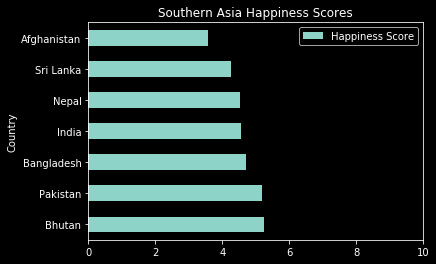

In [4]:
so_asia = happiness2015[happiness2015['Region'] == 'Southern Asia']
so_asia.plot(x='Country', y='Happiness Score', kind='barh', title='Southern Asia Happiness Scores', xlim=(0,10))


In [5]:
# df.grouded('col')

happiness2015['Region'].value_counts() 
grouped = happiness2015.groupby('Region')
grouped.groups # return the index of each group


{'Australia and New Zealand': Int64Index([8, 9], dtype='int64'),
 'Central and Eastern Europe': Int64Index([ 30,  43,  44,  51,  53,  54,  55,  58,  59,  61,  63,  68,  69,
              72,  76,  79,  82,  85,  86,  88,  92,  94,  95, 103, 105, 110,
             126, 129, 133],
            dtype='int64'),
 'Eastern Asia': Int64Index([37, 45, 46, 71, 83, 99], dtype='int64'),
 'Latin America and Caribbean': Int64Index([ 11,  13,  15,  22,  24,  26,  29,  31,  32,  39,  40,  41,  42,
              47,  50,  52,  56,  57,  64,  97, 104, 118],
            dtype='int64'),
 'Middle East and Northern Africa': Int64Index([ 10,  19,  21,  27,  34,  38,  48,  62,  67,  75,  81,  91, 102,
             106, 107, 109, 111, 134, 135, 155],
            dtype='int64'),
 'North America': Int64Index([4, 14], dtype='int64'),
 'Southeastern Asia': Int64Index([23, 33, 60, 73, 74, 89, 98, 128, 144], dtype='int64'),
 'Southern Asia': Int64Index([78, 80, 108, 116, 120, 131, 152], dtype='int64'),
 'Sub-Saharan

In [6]:
aus_nz = grouped.get_group('Australia and New Zealand') # return group 'Australia and New Zealand'
aus_nz


,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
8,New Zealand,Australia and New Zealand,9,7.286,0.03371,1.25018,1.31967,0.90837,0.63938,0.42922,0.47501,2.26425
9,Australia,Australia and New Zealand,10,7.284,0.04083,1.33358,1.30923,0.93156,0.65124,0.35637,0.43562,2.26646


In [7]:
means = grouped.mean() # return the mean by each group
means


,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
Region,,,,,,,,,,
Australia and New Zealand,9.500000,7.285000,0.037270,1.291880,1.314450,0.919965,0.645310,0.392795,0.455315,2.265355
Central and Eastern Europe,79.000000,5.332931,0.045208,0.942438,1.053042,0.718774,0.358269,0.086674,0.152264,2.021400
Eastern Asia,64.500000,5.626167,0.037225,1.151780,1.099427,0.877388,0.462490,0.127695,0.225885,1.681607
Latin America and Caribbean,46.909091,6.144682,0.061127,0.876815,1.104720,0.703870,0.501740,0.117172,0.217788,2.622577
Middle East and Northern Africa,77.600000,5.406900,0.046337,1.066973,0.920490,0.705616,0.361751,0.181702,0.190375,1.980009
North America,10.000000,7.273000,0.036960,1.360400,1.284860,0.883710,0.589505,0.244235,0.429580,2.480935
Southeastern Asia,81.222222,5.317444,0.042691,0.789054,0.940468,0.677357,0.557104,0.151276,0.419261,1.783020
Southern Asia,113.142857,4.580857,0.032161,0.560486,0.645321,0.540830,0.373337,0.102536,0.341429,2.016769
Sub-Saharan Africa,127.900000,4.202800,0.055299,0.380473,0.809085,0.282332,0.365944,0.123878,0.221137,2.019980


In [8]:
happy_grouped = grouped['Happiness Score'] # get 'Happiness Score' column from each `Region` column
happy_mean = happy_grouped.mean() # return the mean of 'Happiness Score' with 'Region' as the index
happy_mean


Region
Australia and New Zealand          7.285000
Central and Eastern Europe         5.332931
Eastern Asia                       5.626167
Latin America and Caribbean        6.144682
Middle East and Northern Africa    5.406900
North America                      7.273000
Southeastern Asia                  5.317444
Southern Asia                      4.580857
Sub-Saharan Africa                 4.202800
Western Europe                     6.689619
Name: Happiness Score, dtype: float64

In [9]:
# Testing the groupby to iloc

grouped = happiness2015.groupby('Region')
grouped.get_group('North America')
north_america = happiness2015.iloc[[4,14]] # using manually
na_group = grouped.get_group('North America') # using groupby
equal = north_america == na_group
equal


,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
4,True,True,True,True,True,True,True,True,True,True,True,True
14,True,True,True,True,True,True,True,True,True,True,True,True


In [10]:
# Syntax `groupby.agg([func_name1, func_name2, func_name3])`

import numpy as np
grouped = happiness2015.groupby('Region')
happy_grouped = grouped['Happiness Score']

def dif(group):
    return (group.max() - group.mean())
mean_max_dif = happy_grouped.agg(dif)
mean_max_dif


Region
Australia and New Zealand          0.001000
Central and Eastern Europe         1.172069
Eastern Asia                       0.671833
Latin America and Caribbean        1.081318
Middle East and Northern Africa    1.871100
North America                      0.154000
Southeastern Asia                  1.480556
Southern Asia                      0.672143
Sub-Saharan Africa                 1.274200
Western Europe                     0.897381
Name: Happiness Score, dtype: float64

In [11]:
happiness2015.groupby('Region')['Happiness Score'].agg(dif)


Region
Australia and New Zealand          0.001000
Central and Eastern Europe         1.172069
Eastern Asia                       0.671833
Latin America and Caribbean        1.081318
Middle East and Northern Africa    1.871100
North America                      0.154000
Southeastern Asia                  1.480556
Southern Asia                      0.672143
Sub-Saharan Africa                 1.274200
Western Europe                     0.897381
Name: Happiness Score, dtype: float64

In [12]:
happy_mean_max = happy_grouped.agg([np.mean,np.max])
happy_mean_max


,mean,amax
Region,,
Australia and New Zealand,7.285000,7.286
Central and Eastern Europe,5.332931,6.505
Eastern Asia,5.626167,6.298
Latin America and Caribbean,6.144682,7.226
Middle East and Northern Africa,5.406900,7.278
North America,7.273000,7.427
Southeastern Asia,5.317444,6.798
Southern Asia,4.580857,5.253
Sub-Saharan Africa,4.202800,5.477


In [13]:
# 'Region` as index & `Happiness Score` as values
happiness_means = happiness2015.groupby('Region')['Happiness Score'].mean()
happiness_means


Region
Australia and New Zealand          7.285000
Central and Eastern Europe         5.332931
Eastern Asia                       5.626167
Latin America and Caribbean        6.144682
Middle East and Northern Africa    5.406900
North America                      7.273000
Southeastern Asia                  5.317444
Southern Asia                      4.580857
Sub-Saharan Africa                 4.202800
Western Europe                     6.689619
Name: Happiness Score, dtype: float64

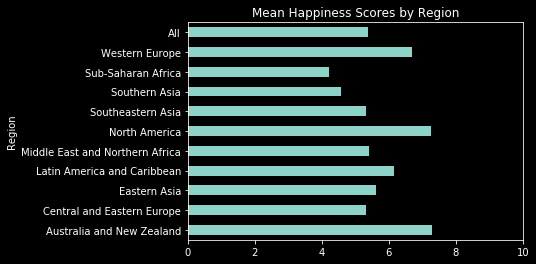

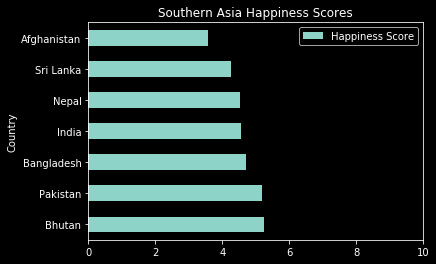

In [14]:
pv_happiness = happiness2015.pivot_table(values='Happiness Score', index='Region', aggfunc=np.mean, margins=True)
pv_happiness.plot(kind='barh', title='Mean Happiness Scores by Region', xlim=(0,10), legend=False)

so_asia = happiness2015[happiness2015['Region'] == 'Southern Asia']
so_asia.plot(x='Country', y='Happiness Score', kind='barh', title='Southern Asia Happiness Scores', xlim=(0,10))

world_mean_happiness = happiness2015["Happiness Score"].mean()


In [15]:
grouped = happiness2015.groupby("Region")[['Happiness Score','Family']]
happy_family_stats = grouped.agg([np.min, np.max, np.mean])
happy_family_stats


Happiness Score                    Family  \
                                           amin   amax      mean     amin   
Region                                                                      
Australia and New Zealand                 7.284  7.286  7.285000  1.30923   
Central and Eastern Europe                4.218  6.505  5.332931  0.38562   
Eastern Asia                              4.874  6.298  5.626167  0.94675   
Latin America and Caribbean               4.518  7.226  6.144682  0.74302   
Middle East and Northern Africa           3.006  7.278  5.406900  0.47489   
North America                             7.119  7.427  7.273000  1.24711   
Southeastern Asia                         3.819  6.798  5.317444  0.62736   
Southern Asia                             3.575  5.253  4.580857  0.30285   
Sub-Saharan Africa                        2.839  5.477  4.202800  0.00000   
Western Europe                            4.857  7.587  6.689619  0.89318   

                                                    
                                    amax      mean  
Region                                              
Australia and New Zealand        1.31967  1.314450  
Central and Eastern Europe       1.34043  1.053042  
Eastern Asia                     1.30060  1.099427  
Latin America and Caribbean      1.30477  1.104720  
Middle East and Northern Africa  1.22393  0.920490  
North America                    1.32261  1.284860  
Southeastern Asia                1.26504  0.940468  
Southern Asia                    1.10395  0.645321  
Sub-Saharan Africa               1.18468  0.809085  
Western Europe                   1.40223  1.247302

In [16]:
pv_happy_family_stats = happiness2015.pivot_table(['Happiness Score','Family'], 'Region', aggfunc = [np.min, np.max, np.mean], margins = True)


 ### COMMON AGGREGATION METHODS

 mean(): Calculates the mean of groups

 sum(): Calculates the sum of group values

 size(): Calculates the size of groups

 count(): Calculates the count of values in groups

 min(): Calculates the minimum of group values

 max(): Calculates the maximum of group values

 ## Combining Data With Pandas

In [17]:
import pandas as pd
happiness2015 = pd.read_csv("World_Happiness_2015.csv")
happiness2016 = pd.read_csv("World_Happiness_2016.csv")
happiness2017 = pd.read_csv("World_Happiness_2017.csv")

happiness2015["Year"] = 2015
happiness2016["Year"] = 2016
happiness2017["Year"] = 2017

head_2015 = happiness2015[['Country','Happiness Score', 'Year']].head(3)
head_2016 = happiness2016[['Country','Happiness Score', 'Year']].head(3)

concat_axis0 = pd.concat([head_2015,head_2016], axis = 0)
concat_axis1 = pd.concat([head_2015,head_2016], axis = 1)

question1 = concat_axis0.shape[0]
question2 = concat_axis1.shape[0]


In [18]:
concat_axis0 # combine to down


,Country,Happiness Score,Year
0,Switzerland,7.587,2015
1,Iceland,7.561,2015
2,Denmark,7.527,2015
0,Denmark,7.526,2016
1,Switzerland,7.509,2016
2,Iceland,7.501,2016


In [19]:
concat_axis1 # combine to left


,Country,Happiness Score,Year,Country,Happiness Score,Year
0,Switzerland,7.587,2015,Denmark,7.526,2016
1,Iceland,7.561,2015,Switzerland,7.509,2016
2,Denmark,7.527,2015,Iceland,7.501,2016


In [20]:
# Combining two different shape dataframe
head_2015 = happiness2015[['Year','Country','Happiness Score', 'Standard Error']].head(4)
head_2016 = happiness2016[['Country','Happiness Score', 'Year']].head(3)

concat_axis2 = pd.concat([head_2015,head_2016], axis = 0)
rows = concat_axis2.shape[0]
columns = concat_axis2.shape[1]
concat_axis2


/Users/kevinmtaing/Library/Python/3.7/lib/python/site-packages/ipykernel_launcher.py:5: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  """


,Country,Happiness Score,Standard Error,Year
0,Switzerland,7.587,0.03411,2015
1,Iceland,7.561,0.04884,2015
2,Denmark,7.527,0.03328,2015
3,Norway,7.522,0.03880,2015
0,Denmark,7.526,NaN,2016
1,Switzerland,7.509,NaN,2016
2,Iceland,7.501,NaN,2016


In [21]:
# Clear the exist index
concat_update_index = pd.concat([head_2015,head_2016], axis = 0, ignore_index = True)
concat_update_index


/Users/kevinmtaing/Library/Python/3.7/lib/python/site-packages/ipykernel_launcher.py:2: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  


,Country,Happiness Score,Standard Error,Year
0,Switzerland,7.587,0.03411,2015
1,Iceland,7.561,0.04884,2015
2,Denmark,7.527,0.03328,2015
3,Norway,7.522,0.03880,2015
4,Denmark,7.526,NaN,2016
5,Switzerland,7.509,NaN,2016
6,Iceland,7.501,NaN,2016


In [22]:
# Combining two dataframe by column
three_2015 = happiness2015[['Country','Happiness Rank','Year']].iloc[2:5]
three_2016 = happiness2016[['Country','Happiness Rank','Year']].iloc[2:5]

merged = pd.merge(left=three_2015, right=three_2016, on='Country') # inner
merged


,Country,Happiness Rank_x,Year_x,Happiness Rank_y,Year_y
0,Norway,4,2015,4,2016


In [23]:
merged_left = pd.merge(left=three_2015, right=three_2016, how='left', on='Country') # outer based on "three_2015"
merged_left


,Country,Happiness Rank_x,Year_x,Happiness Rank_y,Year_y
0,Denmark,3,2015,NaN,NaN
1,Norway,4,2015,4.0,2016.0
2,Canada,5,2015,NaN,NaN


In [24]:
merged_left_updated = pd.merge(left=three_2016, right=three_2015, how='left', on='Country') # outer based on "three_2016"
merged_left_updated


,Country,Happiness Rank_x,Year_x,Happiness Rank_y,Year_y
0,Iceland,3,2016,NaN,NaN
1,Norway,4,2016,4.0,2015.0
2,Finland,5,2016,NaN,NaN


In [25]:
merged_suffixes = pd.merge(left=three_2015, right=three_2016, how='left', on='Country', suffixes = ('_2015', '_2016'))
merged_suffixes


,Country,Happiness Rank_2015,Year_2015,Happiness Rank_2016,Year_2016
0,Denmark,3,2015,NaN,NaN
1,Norway,4,2015,4.0,2016.0
2,Canada,5,2015,NaN,NaN


In [26]:
merged_updated_suffixes = pd.merge(left=three_2016, right=three_2015, how = 'left', on='Country', suffixes = ('_2016', '_2015'))
merged_updated_suffixes


,Country,Happiness Rank_2016,Year_2016,Happiness Rank_2015,Year_2015
0,Iceland,3,2016,NaN,NaN
1,Norway,4,2016,4.0,2015.0
2,Finland,5,2016,NaN,NaN


In [27]:
import pandas as pd
four_2015 = happiness2015[['Country','Happiness Rank','Year']].iloc[2:6]
three_2016 = happiness2016[['Country','Happiness Rank','Year']].iloc[2:5]

merge_index = pd.merge(left = four_2015,right = three_2016, left_index = True, right_index = True, suffixes = ('_2015','_2016')) # keep the index from original data
merge_index


,Country_2015,Happiness Rank_2015,Year_2015,Country_2016,Happiness Rank_2016,Year_2016
2,Denmark,3,2015,Iceland,3,2016
3,Norway,4,2015,Norway,4,2016
4,Canada,5,2015,Finland,5,2016


In [28]:
merge_index_left = pd.merge(left = four_2015,right = three_2016, left_index = True, right_index = True, how = "left", suffixes = ('_2015','_2016'))
rows = merge_index_left.shape[0]
columns = merge_index_left.shape[1]
merge_index_left # the result contain only common index


,Country_2015,Happiness Rank_2015,Year_2015,Country_2016,Happiness Rank_2016,Year_2016
2,Denmark,3,2015,Iceland,3.0,2016.0
3,Norway,4,2015,Norway,4.0,2016.0
4,Canada,5,2015,Finland,5.0,2016.0
5,Finland,6,2015,NaN,NaN,NaN


/Users/kevinmtaing/Library/Python/3.7/lib/python/site-packages/ipykernel_launcher.py:3: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  This is separate from the ipykernel package so we can avoid doing imports until


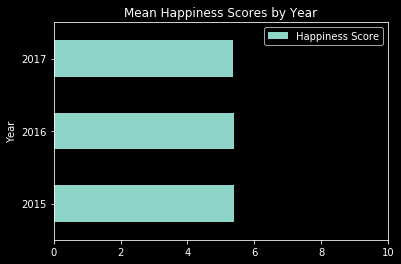

In [29]:
happiness2017.rename(columns={'Happiness.Score': 'Happiness Score'}, inplace=True)

combined = pd.concat([happiness2015, happiness2016, happiness2017], axis = 0)

pivot_table_combined = combined.pivot_table(index='Year', values='Happiness Score', aggfunc = np.mean)

pivot_table_combined.plot(kind='barh', title='Mean Happiness Scores by Year', xlim=(0,10))


 Inner: only includes elements that appear in both dataframes with a common key

 Outer: includes all data from both dataframes

 Left: includes all of the rows from the "left" dataframe along with any rows from the "right" dataframe with a common key; the result retains all columns from both of the original dataframes

 Right: includes all of the rows from the "right" dataframe along with any rows from the "left" dataframe with a common key; the result retains all columns from both of the original dataframes

 | | pd.concat() | pd.merge() |
 | --- | --- | --- |
 | Default Join Type | Outer | Inner |
 Can Combine More Than Two Dataframes at a Time? |	Yes | No |
 Can Combine Dataframes Vertically (axis=0) or Horizontally (axis=1)? | Both | Horizontally |
 | Syntax | Concat (Vertically)<br>concat([df1,df2,df3])<br><br>Concat (Horizontally)<br>concat([df1,df2,df3], axis = 1) | Merge (Join on Columns)<br>merge(left = df1, right = df2, how = 'join_type', on = 'Col')<br><br>Merge (Join on Index)<br>merge(left = df1, right = df2, how = 'join_type', left_index = True, right_index = True) |

 ### Transforming Data with Pandas

In [30]:
mapping = {'Economy (GDP per Capita)': 'Economy', 'Health (Life Expectancy)': 'Health', 'Trust (Government Corruption)': 'Trust' }

happiness2015 = happiness2015.rename(mapping, axis =1)


In [31]:
def label1(element):
    if element > 1:
        return 'High'
    else:
        return 'Low'

# Map values of Series according to input correspondence
economy_impact_map = happiness2015['Economy'].map(label1)

# method to apply a function with additional arguments element-wise
economy_impact_apply1 = happiness2015['Economy'].apply(label1) 
equal = economy_impact_map.equals(economy_impact_apply1)
print(economy_impact_map)


0      High
1      High
2      High
3      High
4      High
       ... 
153     Low
154     Low
155     Low
156     Low
157     Low
Name: Economy, Length: 158, dtype: object


In [32]:
# define element and x
def label2(element, x):
    if element > x:
        return 'High'
    else:
        return 'Low'
economy_impact_apply2 = happiness2015['Economy'].apply(label2, x = 0.8)


In [33]:
economy_apply = happiness2015['Economy'].apply(label1)

factors = ['Economy', 'Family', 'Health', 'Freedom', 'Trust', 'Generosity']

# apply functions element-wise to multiple columns at once
factors_impact = happiness2015[factors].applymap(label1)


In [34]:
def v_counts(col):
    num = col.value_counts()
    den = col.size
    return num/den

v_counts_pct = factors_impact.apply(v_counts)
print(v_counts_pct)


Economy    Family    Health  Freedom  Trust  Generosity
High  0.417722  0.563291  0.012658      NaN    NaN         NaN
Low   0.582278  0.436709  0.987342      1.0    1.0         1.0


In [35]:
#Calculate the sum of the factor columns in each row.
happiness2015['Factors Sum'] = happiness2015[['Economy', 'Family', 'Health', 'Freedom', 'Trust', 'Generosity', 'Dystopia Residual']].sum(axis=1)

#Display the first five rows of the result and the Happiness Score column.
happiness2015[['Happiness Score', 'Factors Sum']].head()


,Happiness Score,Factors Sum
0,7.587,7.58696
1,7.561,7.56092
2,7.527,7.52708
3,7.522,7.52222
4,7.427,7.42694


In [36]:
factors = ['Economy', 'Family', 'Health', 'Freedom', 'Trust', 'Generosity', 'Dystopia Residual']

def percentages(col):
    div = col/happiness2015['Happiness Score']
    return div*100
factor_percentages = happiness2015[factors].apply(percentages)


In [37]:
main_cols = ['Country', 'Region', 'Happiness Rank', 'Happiness Score']
factors = ['Economy', 'Family', 'Health', 'Freedom', 'Trust', 'Generosity', 'Dystopia Residual']

# id_vars = the name of the columns that should remain in the same result
# value_vars = the name of the columns that should be changed to rows in the result

melt = pd.melt(happiness2015, id_vars=main_cols, value_vars=factors)
melt['Percentage'] = round(100*melt['value']/melt['Happiness Score'],2)
print(melt)


Country                           Region  Happiness Rank  \
0     Switzerland                   Western Europe               1   
1         Iceland                   Western Europe               2   
2         Denmark                   Western Europe               3   
3          Norway                   Western Europe               4   
4          Canada                    North America               5   
...           ...                              ...             ...   
1101       Rwanda               Sub-Saharan Africa             154   
1102        Benin               Sub-Saharan Africa             155   
1103        Syria  Middle East and Northern Africa             156   
1104      Burundi               Sub-Saharan Africa             157   
1105         Togo               Sub-Saharan Africa             158   

      Happiness Score           variable    value  Percentage  
0               7.587            Economy  1.39651       18.41  
1               7.561            Economy 

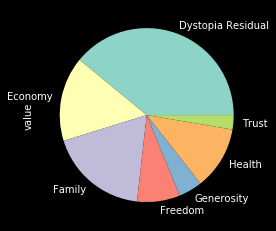

In [38]:
pv_melt = melt.pivot_table(index='variable', values='value')
pv_melt.plot(kind='pie', y='value', legend=False)


/Users/kevinmtaing/Library/Python/3.7/lib/python/site-packages/ipykernel_launcher.py:2: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  


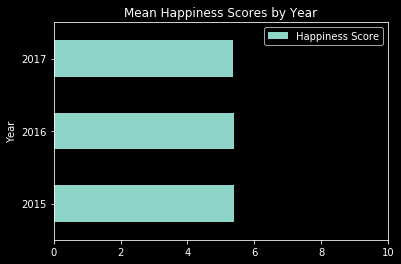

In [39]:
#Concatenate happiness2015, happiness2016, and happiness2017.
combined = pd.concat([happiness2015, happiness2016, happiness2017])

#Create a pivot table listing the mean happiness score for each year. Since the default aggregation function is the mean, we excluded the `aggfunc` argument.
pivot_table_combined = combined.pivot_table(index = 'Year', values = 'Happiness Score')

#Plot the pivot table.
pivot_table_combined.plot(kind ='barh', title='Mean Happiness Scores by Year', xlim = (0,10))


 | Method | Series or Dataframe Method | Applies Functions Element-wise? |
 | --- | --- | --- |
 | Map | Series | Yes |
 | Apply | Series | Yes |
 | Applymap | Dataframe | Yes |
 | Apply | Dataframe | No, applies functions along an axis |

 ## Working With Strings In Pandas
 | Method | Description |
 | --- | ---|
 | Series.str.split()|Splits each element in the Series.|
 | Series.str.strip()|Strips whitespace from each string in the Series.|
 | Series.str.lower()|Converts strings in the Series to lowercase.|
 | Series.str.upper()|Converts strings in the Series to uppercase.|
 | Series.str.get()|Retrieves the ith element of each element in the Series.|
 | Series.str.replace()|Replaces a regex or string in the Series with another string.|
 | Series.str.cat()|Concatenates strings in a Series.|
 | Series.str.extract()|Extracts substrings from the Series matching a regex pattern.|
 Find specific strings or substrings in a column:

 `df[col_name].str.contains(pattern)`

 Extract specific strings or substrings in a column:

 `df[col_name].str.extract(pattern)`

 Extract more than one group of patterns from a column:

 `df[col_name].str.extractall(pattern)`

 Replace a regex or string in a column with another string:

 `df[col_name].str.replace(pattern, replacement_string)`

In [40]:
world_dev = pd.read_csv("World_dev.csv")
col_renaming = {'SourceOfMostRecentIncomeAndExpenditureData': 'IESurvey'}
world_dev = world_dev.rename(col_renaming, axis = 1)

merged = pd.merge(left=happiness2015, right=world_dev, how='left', left_on=happiness2015['Country'], right_on=world_dev['ShortName'])


In [41]:
def extract_last_word(element):
    element = str(element)
    element = element.split()
    return element[-1]

merged['Currency Apply'] = merged['CurrencyUnit'].apply(extract_last_word)
merged['Currency Apply'].head(5)


0     franc
1     krona
2     krone
3     krone
4    dollar
Name: Currency Apply, dtype: object

In [42]:
merged['Currency Vectorized'] = merged['CurrencyUnit'].str.split().str.get(-1)
merged['Currency Vectorized'].head(5)


0     franc
1     krona
2     krone
3     krone
4    dollar
Name: Currency Vectorized, dtype: object

In [43]:
lengths = merged['CurrencyUnit'].str.len()
value_counts = lengths.value_counts(dropna=False)

# return the length of each currency unit
def lengths_str(element):
    return len(str(element))
lengths_apply1 = merged['CurrencyUnit'].apply(lengths_str)

# exclude the missing values
def lengths_missing(element):
    if pd.isnull(element):
        pass
    else:
        return len(str(element))
lengths_apply2 = merged['CurrencyUnit'].apply(lengths_missing)


In [44]:
pattern = r"[Nn]ational accounts"
national_accounts = merged['SpecialNotes'].str.contains(pattern)
national_accounts.head(5)


0     NaN
1     NaN
2     NaN
3     NaN
4    True
Name: SpecialNotes, dtype: object

In [45]:
#Return the value counts for each value in the Series, including missing values.
pattern = r"[Nn]ational accounts"
national_accounts = merged['SpecialNotes'].str.contains(pattern, na=False)
merged_national_accounts = merged[national_accounts]
merged_national_accounts.head()


,key_0,Country,Region_x,Happiness Rank,Happiness Score,Standard Error,Economy,Family,Health,Freedom,...,LatestPopulationCensus,LatestHouseholdSurvey,IESurvey,VitalRegistrationComplete,LatestAgriculturalCensus,LatestIndustrialData,LatestTradeData,LatestWaterWithdrawalData,Currency Apply,Currency Vectorized
4,Canada,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,...,2011,NaN,"Labor force survey (LFS), 2010",Yes,2011,2011.0,2013.0,1986.0,dollar,dollar
7,Sweden,Sweden,Western Europe,8,7.364,0.03157,1.33171,1.28907,0.91087,0.65980,...,2011,NaN,"Income survey (IS), 2005",Yes,2010,2010.0,2013.0,2007.0,krona,krona
8,New Zealand,New Zealand,Australia and New Zealand,9,7.286,0.03371,1.25018,1.31967,0.90837,0.63938,...,2013,NaN,NaN,Yes,2012,2010.0,2013.0,2002.0,dollar,dollar
9,Australia,Australia,Australia and New Zealand,10,7.284,0.04083,1.33358,1.30923,0.93156,0.65124,...,2011,NaN,"Expenditure survey/budget survey (ES/BS), 2003",Yes,2011,2011.0,2013.0,2000.0,dollar,dollar
14,United States,United States,North America,15,7.119,0.03839,1.39451,1.24711,0.86179,0.54604,...,2010,NaN,"Labor force survey (LFS), 2010",Yes,2012,2008.0,2013.0,2005.0,dollar,dollar


In [46]:
pattern = r"([1-2][0-9]{3})"
pattern =r"([0-9]{4})"
years = merged['SpecialNotes'].str.extract(pattern)


In [47]:
# syntax `(?P<Column_Name>...)`
# caturing the column `Years`
pattern = r"(?P<Years>[1-2][0-9]{3})"
years = merged['IESurvey'].str.extractall(pattern)
value_counts = years['Years'].value_counts()
print(value_counts)


2012    33
2010    28
2011    22
2013    12
2009     8
2005     6
2008     6
2007     4
2004     3
1992     1
1995     1
2000     1
2002     1
1999     1
2006     1
2003     1
1998     1
Name: Years, dtype: int64


In [48]:
pattern = r"(?P<First_Year>[1-2][0-9]{3})/?(?P<Second_Year>[0-9]{2})?"
years = merged['IESurvey'].str.extractall(pattern)
first_two_year = years['First_Year'].str[0:2]
years['Second_Year'] = first_two_year + years['Second_Year']


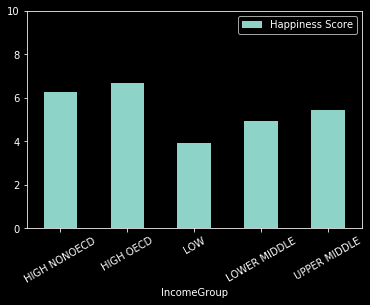

In [49]:
import matplotlib.pyplot as plt
merged['IncomeGroup'] = merged['IncomeGroup'].str.replace(' income', '').str.replace(':', '').str.upper()
pv_incomes = merged.pivot_table(values='Happiness Score', index='IncomeGroup')
pv_incomes.plot(kind='bar', rot=30, ylim=(0,10))
plt.show()


 ## Working With Missing And Duplicate Data
 Although there is no perfect way to handle missing values and each situation is different, now we know the basic techniques and built some intuition around them to better inform our decisions. Below is the workflow we used to clean missing values:
 * Check for errors in data cleaning/transformation.
 * Use data from additional sources to fill missing values.
 * Drop row/column.
 * Fill missing values with reasonable estimates computed from the available data.


 We also started to set a more defined data cleaning workflow, in which we:
 * Set a goal for the project.
 * Researched and tried to understand the data.
 * Determined what data was needed to complete our analysis.
 * Added columns.
 * Cleaned specific data types.
 * Combined data sets.
 * Removed duplicate values.
 * Handled the missing values.

In [50]:
# find the total missing value in each dataset
missing_2015 = happiness2015.isnull().sum()
missing_2016 = happiness2016.isnull().sum()
missing_2017 = happiness2017.isnull().sum()


In [51]:
# cleaning the name of the column
happiness2017.columns = happiness2017.columns.str.replace('.', ' ').str.replace('\s+', ' ').str.strip().str.upper()
happiness2016.columns = happiness2016.columns.str.replace(r'[\(\)]', '').str.strip().str.upper()
happiness2015.columns = happiness2015.columns.str.replace(r'[\(\)]', '').str.strip().str.upper()


combined = pd.concat([happiness2015, happiness2016, happiness2017], ignore_index = True)
missing = combined.isnull().sum()
print(missing)


COUNTRY                          0
DYSTOPIA RESIDUAL                0
ECONOMY                        312
ECONOMY GDP PER CAPITA         158
FACTORS SUM                    312
FAMILY                           0
FREEDOM                          0
GENEROSITY                       0
HAPPINESS RANK                   0
HAPPINESS SCORE                  0
HEALTH                         312
HEALTH LIFE EXPECTANCY         158
LOWER CONFIDENCE INTERVAL      313
REGION                         155
STANDARD ERROR                 312
TRUST                          312
TRUST GOVERNMENT CORRUPTION    158
UPPER CONFIDENCE INTERVAL      313
WHISKER HIGH                   315
WHISKER LOW                    315
YEAR                             0
dtype: int64
/Users/kevinmtaing/Library/Python/3.7/lib/python/site-packages/ipykernel_launcher.py:7: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior,

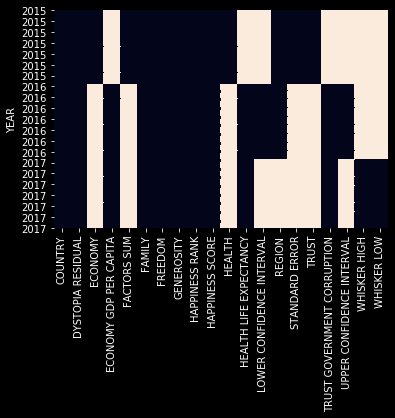

In [52]:
# graph the location of the missing value
import seaborn as sns
combined_updated = combined.set_index('YEAR')
sns.heatmap(combined_updated.isnull(), cbar=False)


 We can make the following observations:
 * No values are missing in the `COUNTRY` column.
 * There are some rows in the 2015, 2016, and 2017 data with missing values in all columns EXCEPT the `COUNTRY` column.
 * Some columns only have data populated for one year.
 * It looks like the `REGION` data is missing for the year 2017.

In [53]:
regions_2017 = combined[combined['YEAR'] == 2017]['REGION']
missing_region = regions_2017.isnull().sum()
print(missing_region)


155


In [54]:
regions = combined[['COUNTRY','REGION']]
combined = pd.merge(left = combined, right = regions, on = 'COUNTRY', how = 'left')
combined = combined.drop('REGION_x', axis = 1)
combined.isnull().sum()


COUNTRY                          0
DYSTOPIA RESIDUAL                0
ECONOMY                        912
ECONOMY GDP PER CAPITA         458
FACTORS SUM                    912
FAMILY                           0
FREEDOM                          0
GENEROSITY                       0
HAPPINESS RANK                   0
HAPPINESS SCORE                  0
HEALTH                         912
HEALTH LIFE EXPECTANCY         458
LOWER CONFIDENCE INTERVAL      912
STANDARD ERROR                 912
TRUST                          912
TRUST GOVERNMENT CORRUPTION    458
UPPER CONFIDENCE INTERVAL      912
WHISKER HIGH                   916
WHISKER LOW                    916
YEAR                             0
REGION_y                       454
dtype: int64

In [55]:
# finding the duplication
combined['COUNTRY'] = combined['COUNTRY'].str.upper()
dups = combined.duplicated(['COUNTRY','YEAR'])
combined[dups]


,COUNTRY,DYSTOPIA RESIDUAL,ECONOMY,ECONOMY GDP PER CAPITA,FACTORS SUM,FAMILY,FREEDOM,GENEROSITY,HAPPINESS RANK,HAPPINESS SCORE,...,HEALTH LIFE EXPECTANCY,LOWER CONFIDENCE INTERVAL,STANDARD ERROR,TRUST,TRUST GOVERNMENT CORRUPTION,UPPER CONFIDENCE INTERVAL,WHISKER HIGH,WHISKER LOW,YEAR,REGION_y
1,SWITZERLAND,2.517380,1.39651,NaN,7.58696,1.349510,0.665570,0.296780,1,7.587,...,NaN,NaN,0.03411,0.41978,NaN,NaN,NaN,NaN,2015,Western Europe
2,SWITZERLAND,2.517380,1.39651,NaN,7.58696,1.349510,0.665570,0.296780,1,7.587,...,NaN,NaN,0.03411,0.41978,NaN,NaN,NaN,NaN,2015,NaN
4,ICELAND,2.702010,1.30232,NaN,7.56092,1.402230,0.628770,0.436300,2,7.561,...,NaN,NaN,0.04884,0.14145,NaN,NaN,NaN,NaN,2015,Western Europe
5,ICELAND,2.702010,1.30232,NaN,7.56092,1.402230,0.628770,0.436300,2,7.561,...,NaN,NaN,0.04884,0.14145,NaN,NaN,NaN,NaN,2015,NaN
7,DENMARK,2.492040,1.32548,NaN,7.52708,1.360580,0.649380,0.341390,3,7.527,...,NaN,NaN,0.03328,0.48357,NaN,NaN,NaN,NaN,2015,Western Europe
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1363,TANZANIA,0.621130,NaN,0.511136,NaN,1.041990,0.390018,0.354256,153,3.349,...,0.364509,NaN,NaN,NaN,0.066035,NaN,3.461430,3.236570,2017,Sub-Saharan Africa
1364,TANZANIA,0.621130,NaN,0.511136,NaN,1.041990,0.390018,0.354256,153,3.349,...,0.364509,NaN,NaN,NaN,0.066035,NaN,3.461430,3.236570,2017,NaN
1366,BURUNDI,1.683024,NaN,0.091623,NaN,0.629794,0.059901,0.204435,154,2.905,...,0.151611,NaN,NaN,NaN,0.084148,NaN,3.074690,2.735310,2017,Sub-Saharan Africa
1367,BURUNDI,1.683024,NaN,0.091623,NaN,0.629794,0.059901,0.204435,154,2.905,...,0.151611,NaN,NaN,NaN,0.084148,NaN,3.074690,2.735310,2017,NaN


In [56]:
# dropping the duplication
combined['COUNTRY'] = combined['COUNTRY'].str.upper()
combined = combined.drop_duplicates(['COUNTRY','YEAR'])


In [57]:
# dropping unused column
columns_to_drop = ['LOWER CONFIDENCE INTERVAL', 'STANDARD ERROR', 'UPPER CONFIDENCE INTERVAL', 'WHISKER HIGH', 'WHISKER LOW']

combined = combined.drop(columns_to_drop,axis = 1)
# dropping any columns that have less than 159 non null value
combined = combined.dropna(thresh = 159, axis = 1)


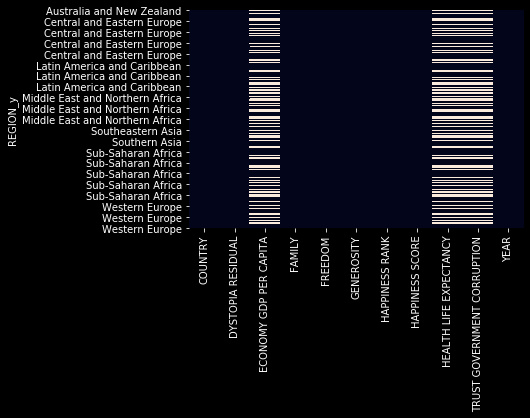

In [58]:
sorted = combined.set_index('REGION_y').sort_values(['REGION_y', 'HAPPINESS SCORE'])
sns.heatmap(sorted.isnull(), cbar=False)


 From the graph, we confirmed:
 * Only about 4 percent of the values in each column are missing.
 * Dropping rows with missing values won't cause us to lose information in other columns.


 There are many options for choosing the replacement value, including:
 * A constant value
 * The mean of the column
 * The median of the column
 * The mode of the column

In [59]:
happiness_mean = combined['HAPPINESS SCORE'].mean()
print(happiness_mean)

combined['HAPPINESS SCORE UPDATED'] = combined['HAPPINESS SCORE'].fillna(happiness_mean)

# the replacing missing values with the Series mean doesn't change the mean of the Series.
print(combined['HAPPINESS SCORE UPDATED'].mean())


5.370727659882891
5.370727659882891


In [60]:
combined = combined.dropna()
combined.isnull().sum()

COUNTRY                        0
DYSTOPIA RESIDUAL              0
ECONOMY GDP PER CAPITA         0
FAMILY                         0
FREEDOM                        0
GENEROSITY                     0
HAPPINESS RANK                 0
HAPPINESS SCORE                0
HEALTH LIFE EXPECTANCY         0
TRUST GOVERNMENT CORRUPTION    0
YEAR                           0
REGION_y                       0
HAPPINESS SCORE UPDATED        0
dtype: int64